In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### The churn rate measures a company's loss in subscribers for a given period of time. 

In [3]:
df = pd.read_csv("telecommunications_churn.csv")
df.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [4]:
df.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

<AxesSubplot:>

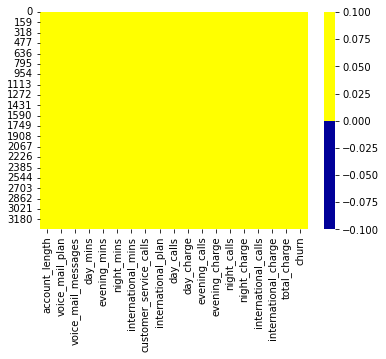

In [6]:
import seaborn as sns
cols = df.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colours))

## There is no null values

In [7]:
df['churn'].unique()

array([0, 1], dtype=int64)

In [8]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [9]:
df.shape

(3333, 19)

### churn is the target variable. It is the one that determines whether the client is still in the company or not.


#### 0-No Churn or loyal customer (customer is still with the company)
#### 1-Churn (Customer left the company)

<AxesSubplot:>

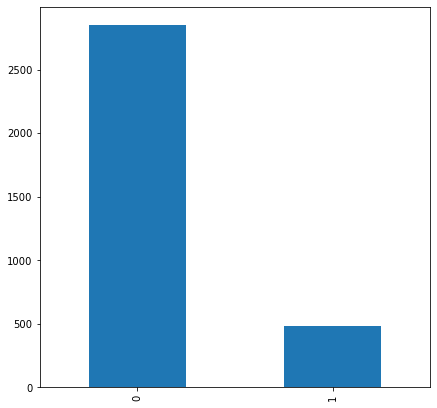

In [10]:
plt.figure(figsize=(7,7))

df["churn"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='churn'>

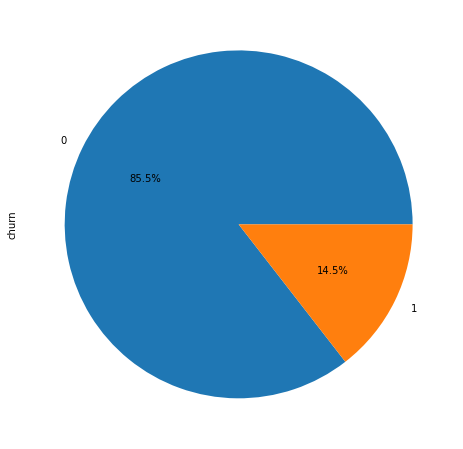

In [11]:
plt.figure(figsize=(10,8))
df["churn"].value_counts().plot(kind="pie",autopct="%1.1f%%")

In [12]:
#x=df.iloc[:,0:18]
#y=df['churn']

# Churn rate

In [13]:
cr=(df.shape[0]-df.churn.value_counts()[0])/df.shape[0]
print('Churn rate is {}%'.format(round(cr*100,2)))

Churn rate is 14.49%


#### 14.49% of the telecom customers left the company

# Correlation

<AxesSubplot:>

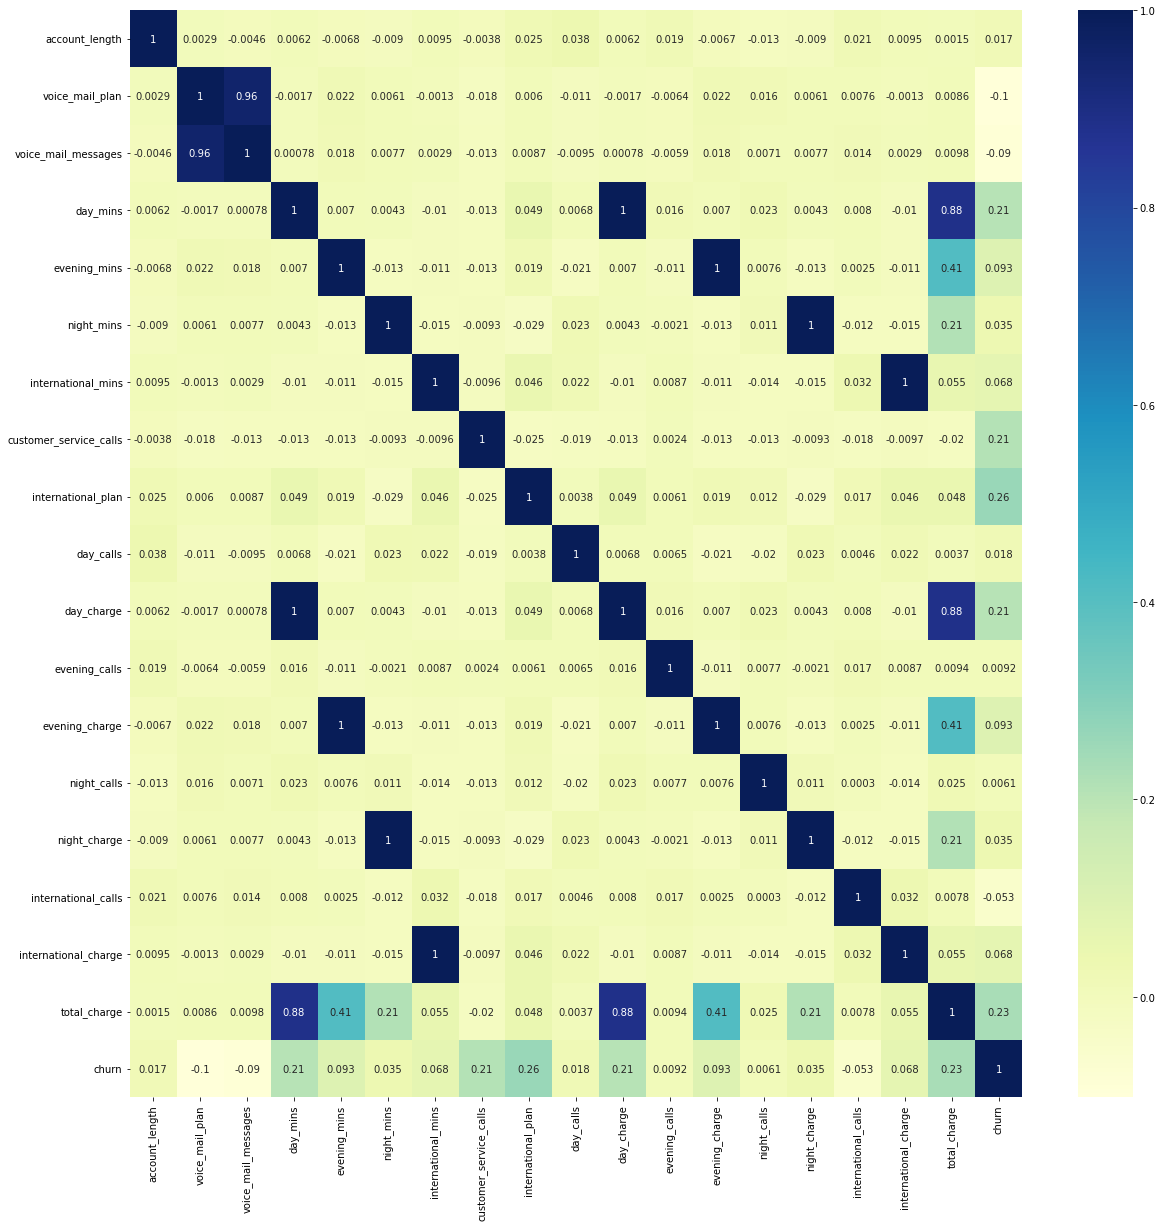

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

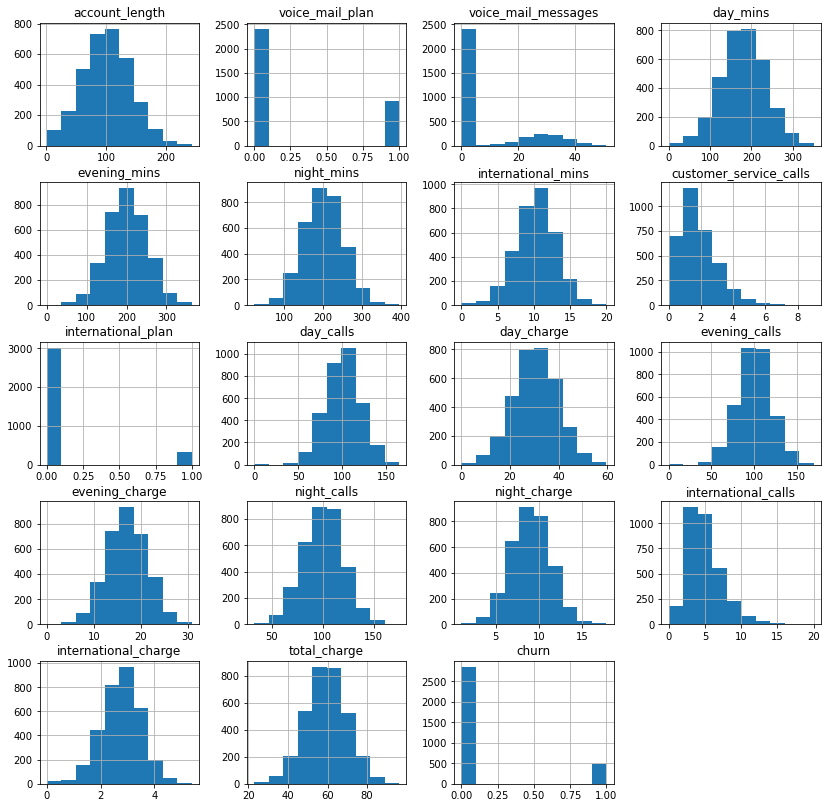

In [15]:
df.hist(figsize=(14,14))
plt.show()

In [16]:
# Seaborn visualization library
#import seaborn as sns
# Create the default pairplot
#sns.pairplot(df)

# Model Building

In [17]:
import sklearn

In [18]:
X=df.iloc[:,0:18]
y=df['churn']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)                       #before smoting the coreectly predicted data is 561 (0) and 28(1)

0.8830584707646177


col_0,0,1
churn,,
0,561,11
1,67,28


# Applying SMOTE technique to balance the data

In [22]:
#pip install imblearn

In [23]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

In [24]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [25]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 2278, 1: 388})
After SMOTE : Counter({0: 2278, 1: 2278})


In [26]:
print(f"value of train data after oversampling: {X_train_smote.shape}")

value of train data after oversampling: (4556, 18)


In [27]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)           # left is actual data, horizontal is predicted data
                                               #after smoting the coreectly predicted data is 389 (0) and 57(1)

0.6686656671664168


col_0,0,1
churn,,
0,389,183
1,38,57


In [28]:
X1 = df.drop('churn',axis=1)
y1 = df['churn']

In [29]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,random_state=40)

## Logistic Regression - After smoting 

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

X2, y2= smote.fit_resample(X1, y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 40)


lg1 = LogisticRegression()
lg1.fit(X2_train,y2_train)


y2_pred_train = lg1.predict(X2_train)
print(f'Training-set accuracy score: {round(accuracy_score(y2_train, y2_pred_train),3)}')
print(classification_report(y2_train, y2_pred_train))


y2_pred_test = lg1.predict(X2_test)
print(f'Testing-set accuracy score: {round(accuracy_score(y2_test, y2_pred_test),3)}')
print(classification_report(y2_test, y2_pred_test))

Training-set accuracy score: 0.69
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      2286
           1       0.68      0.71      0.70      2274

    accuracy                           0.69      4560
   macro avg       0.69      0.69      0.69      4560
weighted avg       0.69      0.69      0.69      4560

Testing-set accuracy score: 0.68
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       564
           1       0.67      0.72      0.69       576

    accuracy                           0.68      1140
   macro avg       0.68      0.68      0.68      1140
weighted avg       0.68      0.68      0.68      1140



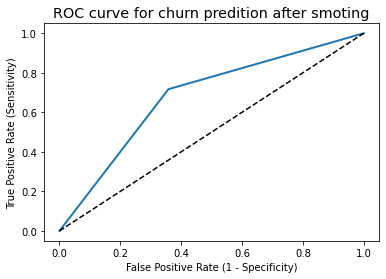

In [31]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = metrics.roc_curve(y2_test,  y2_pred_test)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for churn predition after smoting')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y2_test, y2_pred_test)

print('Confusion matrix\n\n', cm)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ', FP)

print('\nFalse Negatives(FN) = ', FN)


Confusion matrix

 [[362 202]
 [163 413]]

True Positives(TP) =  362

True Negatives(TN) =  413

False Positives(FP) =  202

False Negatives(FN) =  163


<AxesSubplot:>

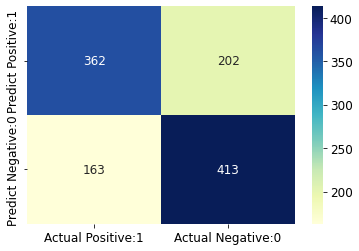

In [33]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm = confusion_matrix(y2_test,y2_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [34]:
# print classification accuracy

classification_accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f'Classification accuracy : {round(classification_accuracy,4)}')


Classification accuracy : 0.6798


In [35]:
# print precision score
precision = TP / float(TP + FP)


print(f'Precision : {round(precision,4)}')

Precision : 0.6418


In [36]:
recall = TP /(TP + FN)

print(f'Recall or Sensitivity : {round(recall,4)}')

Recall or Sensitivity : 0.6895


## SVM Classifier - After smoting

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics

X2, y2= smote.fit_resample(X1, y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 40)


svm1 = SVC()
param_grid = [
              {'kernel':['rbf'],
               'gamma':[0.5,0.1,0.01],
               'C':[10,5,0.1,0.0001] 
              }
             ]
gsv = GridSearchCV(svm1,param_grid,cv=10)
gsv.fit(X2_train,y2_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 5, 0.1, 0.0001], 'gamma': [0.5, 0.1, 0.01],
                          'kernel': ['rbf']}])

In [38]:
gsv.best_params_ , gsv.best_score_ 

({'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}, 0.8449561403508772)

In [39]:
svm1 = SVC(C= 10, gamma = 0.01)             # c= tolerance 
svm1.fit(X2_train,y2_train)


y2_pred_train = svm1.predict(X2_train)
print(f'Training-set accuracy score: {round(accuracy_score(y2_train, y2_pred_train),3)}')
print(classification_report(y2_train, y2_pred_train))


y2_pred_test = svm1.predict(X2_test)
print(f'Testing-set accuracy score: {round(accuracy_score(y2_test, y2_pred_test),3)}')
print(classification_report(y2_test, y2_pred_test))

Training-set accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2286
           1       1.00      1.00      1.00      2274

    accuracy                           1.00      4560
   macro avg       1.00      1.00      1.00      4560
weighted avg       1.00      1.00      1.00      4560

Testing-set accuracy score: 0.849
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       564
           1       1.00      0.70      0.82       576

    accuracy                           0.85      1140
   macro avg       0.88      0.85      0.85      1140
weighted avg       0.88      0.85      0.85      1140



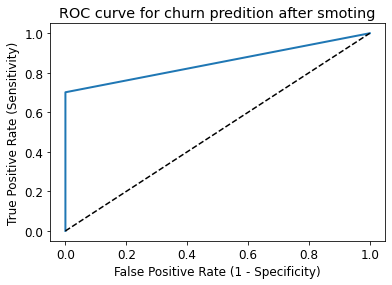

In [40]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = metrics.roc_curve(y2_test,  y2_pred_test)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for churn predition after smoting')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


<AxesSubplot:>

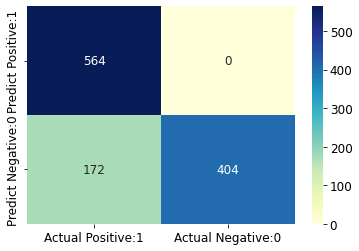

In [41]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm = confusion_matrix(y2_test,y2_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Ada Boost

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

X2, y2= smote.fit_resample(X1, y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 40)

adb = AdaBoostClassifier()
adb.fit(X2_train,y2_train)


y2_pred_train = adb.predict(X2_train)
print(f'Training-set accuracy score: {round(accuracy_score(y2_train, y2_pred_train),3)}')
print(classification_report(y2_train, y2_pred_train))


y2_pred_test = adb.predict(X2_test)
print(f'Testing-set accuracy score: {round(accuracy_score(y2_test, y2_pred_test),3)}')
print(classification_report(y2_test, y2_pred_test))

Training-set accuracy score: 0.845
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2286
           1       0.88      0.80      0.84      2274

    accuracy                           0.84      4560
   macro avg       0.85      0.84      0.84      4560
weighted avg       0.85      0.84      0.84      4560

Testing-set accuracy score: 0.832
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       564
           1       0.87      0.79      0.83       576

    accuracy                           0.83      1140
   macro avg       0.84      0.83      0.83      1140
weighted avg       0.84      0.83      0.83      1140



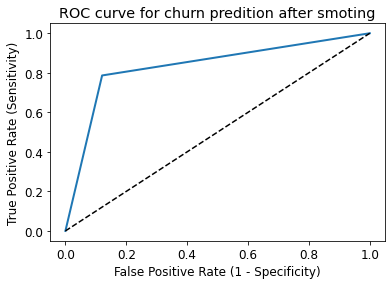

In [43]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = metrics.roc_curve(y2_test,  y2_pred_test)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for churn predition after smoting')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

<AxesSubplot:>

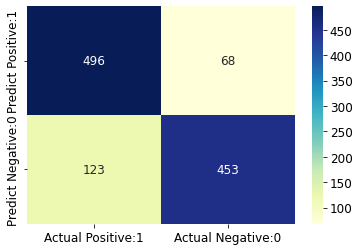

In [44]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm = confusion_matrix(y2_test,y2_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# XG Boost

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier



X2, y2= smote.fit_resample(X1, y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 40)

xgb = XGBClassifier()
xgb.fit(X2_train,y2_train)

y2_pred_train = xgb.predict(X2_train)
print(f'Training-set accuracy score: {round(accuracy_score(y2_train, y2_pred_train),3)}')
print(classification_report(y2_train, y2_pred_train))


y2_pred_test = xgb.predict(X2_test)
print(f'Testing-set accuracy score: {round(accuracy_score(y2_test, y2_pred_test),3)}')
print(classification_report(y2_test, y2_pred_test))

Training-set accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2286
           1       1.00      1.00      1.00      2274

    accuracy                           1.00      4560
   macro avg       1.00      1.00      1.00      4560
weighted avg       1.00      1.00      1.00      4560

Testing-set accuracy score: 0.947
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       564
           1       0.97      0.93      0.95       576

    accuracy                           0.95      1140
   macro avg       0.95      0.95      0.95      1140
weighted avg       0.95      0.95      0.95      1140



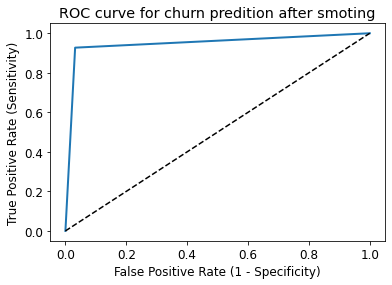

In [46]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = metrics.roc_curve(y2_test,  y2_pred_test)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for churn predition after smoting')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

<AxesSubplot:>

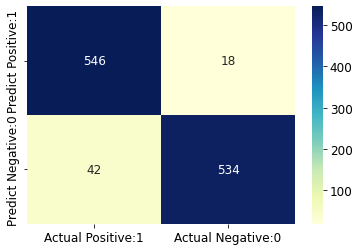

In [47]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm = confusion_matrix(y2_test,y2_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Multinominal Naive Bayes

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.naive_bayes import MultinomialNB

X2, y2= smote.fit_resample(X1, y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 40)


mnb = MultinomialNB()
mnb.fit(X2_train,y2_train)



y2_pred_train = mnb.predict(X2_train)
print(f'Training-set accuracy score: {round(accuracy_score(y2_train, y2_pred_train),3)}')
print(classification_report(y2_train, y2_pred_train))


y2_pred_test = mnb.predict(X2_test)
print(f'Testing-set accuracy score: {round(accuracy_score(y2_test, y2_pred_test),3)}')
print(classification_report(y2_test, y2_pred_test))

Training-set accuracy score: 0.584
              precision    recall  f1-score   support

           0       0.59      0.55      0.57      2286
           1       0.58      0.62      0.60      2274

    accuracy                           0.58      4560
   macro avg       0.58      0.58      0.58      4560
weighted avg       0.58      0.58      0.58      4560

Testing-set accuracy score: 0.58
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       564
           1       0.58      0.62      0.60       576

    accuracy                           0.58      1140
   macro avg       0.58      0.58      0.58      1140
weighted avg       0.58      0.58      0.58      1140



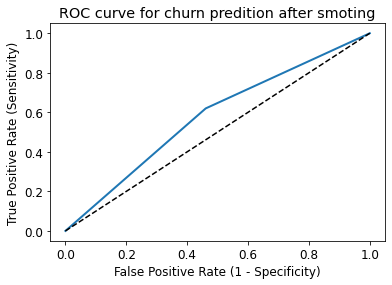

In [49]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = metrics.roc_curve(y2_test,  y2_pred_test)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for churn predition after smoting')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

<AxesSubplot:>

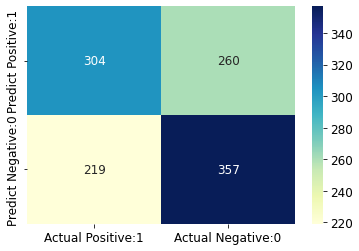

In [50]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm = confusion_matrix(y2_test,y2_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Gaussian Naive Bayes

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB

X2, y2= smote.fit_resample(X1, y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 40)


gnb = GaussianNB()
gnb.fit(X2_train,y2_train)



y2_pred_train = gnb.predict(X2_train)
print(f'Training-set accuracy score: {round(accuracy_score(y2_train, y2_pred_train),3)}')
print(classification_report(y2_train, y2_pred_train))


y2_pred_test = gnb.predict(X2_test)
print(f'Testing-set accuracy score: {round(accuracy_score(y2_test, y2_pred_test),3)}')
print(classification_report(y2_test, y2_pred_test))

Training-set accuracy score: 0.728
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      2286
           1       0.71      0.77      0.74      2274

    accuracy                           0.73      4560
   macro avg       0.73      0.73      0.73      4560
weighted avg       0.73      0.73      0.73      4560

Testing-set accuracy score: 0.734
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       564
           1       0.72      0.78      0.75       576

    accuracy                           0.73      1140
   macro avg       0.74      0.73      0.73      1140
weighted avg       0.74      0.73      0.73      1140



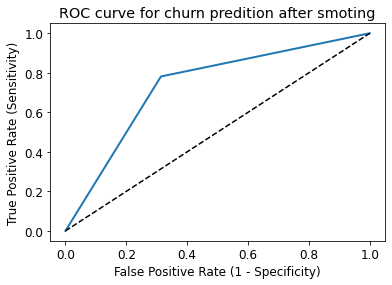

In [52]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = metrics.roc_curve(y2_test,  y2_pred_test)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for churn predition after smoting')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

<AxesSubplot:>

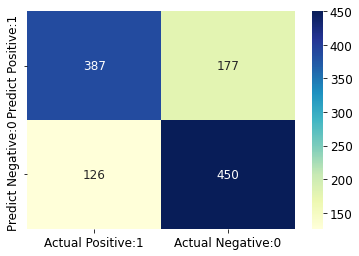

In [53]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm = confusion_matrix(y2_test,y2_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Decission Tree - After smoting

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X2, y2= smote.fit_resample(X1, y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 40)


Dt1 = DecisionTreeClassifier()
Dt1.fit(X2_train,y2_train)


y2_pred_train = Dt1.predict(X2_train)
print(f'Training-set accuracy score: {round(accuracy_score(y2_train, y2_pred_train),3)}')
print(classification_report(y2_train, y2_pred_train))


y2_pred_test = Dt1.predict(X2_test)
print(f'Testing-set accuracy score: {round(accuracy_score(y2_test, y2_pred_test),3)}')
print(classification_report(y2_test, y2_pred_test))

Training-set accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2286
           1       1.00      1.00      1.00      2274

    accuracy                           1.00      4560
   macro avg       1.00      1.00      1.00      4560
weighted avg       1.00      1.00      1.00      4560

Testing-set accuracy score: 0.896
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       564
           1       0.89      0.91      0.90       576

    accuracy                           0.90      1140
   macro avg       0.90      0.90      0.90      1140
weighted avg       0.90      0.90      0.90      1140



Training-set accuracy score: 0.893
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2286
           1       0.99      0.79      0.88      2274

    accuracy                           0.89      4560
   macro avg       0.91      0.89      0.89      4560
weighted avg       0.91      0.89      0.89      4560

Testing-set accuracy score: 0.873
              precision    recall  f1-score   support

           0       0.81      0.98      0.88       564
           1       0.97      0.77      0.86       576

    accuracy                           0.87      1140
   macro avg       0.89      0.87      0.87      1140
weighted avg       0.89      0.87      0.87      1140



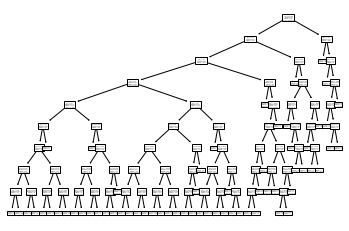

In [55]:
Dt2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=9)
Dt2.fit(X2_train,y2_train)

from sklearn import tree
tree.plot_tree(Dt2);


y2_pred_train = Dt2.predict(X2_train)
print(f'Training-set accuracy score: {round(accuracy_score(y2_train, y2_pred_train),3)}')
print(classification_report(y2_train, y2_pred_train))


y2_pred_test = Dt2.predict(X2_test)
print(f'Testing-set accuracy score: {round(accuracy_score(y2_test, y2_pred_test),3)}')
print(classification_report(y2_test, y2_pred_test))

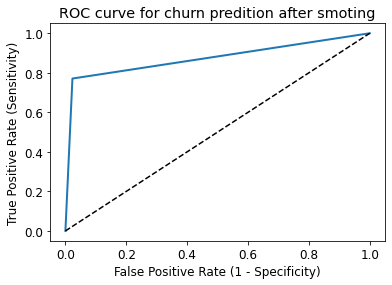

In [56]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = metrics.roc_curve(y2_test,  y2_pred_test)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for churn predition after smoting')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


<AxesSubplot:>

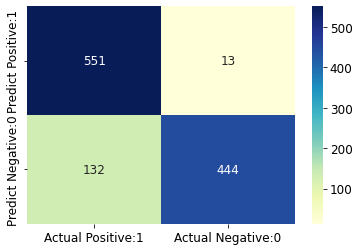

In [57]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm = confusion_matrix(y2_test,y2_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Random Forest - After smoting

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X2, y2= smote.fit_resample(X1, y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 40)


Rf = RandomForestClassifier()
Rf.fit(X2_train,y2_train)


y2_pred_train = Rf.predict(X2_train)
print(f'Training-set accuracy score: {round(accuracy_score(y2_train, y2_pred_train),3)}')
print(classification_report(y2_train, y2_pred_train))


y2_pred_test = Rf.predict(X2_test)
print(f'Testing-set accuracy score: {round(accuracy_score(y2_test, y2_pred_test),3)}')
print(classification_report(y2_test, y2_pred_test))

Training-set accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2286
           1       1.00      1.00      1.00      2274

    accuracy                           1.00      4560
   macro avg       1.00      1.00      1.00      4560
weighted avg       1.00      1.00      1.00      4560

Testing-set accuracy score: 0.946
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       564
           1       0.99      0.91      0.94       576

    accuracy                           0.95      1140
   macro avg       0.95      0.95      0.95      1140
weighted avg       0.95      0.95      0.95      1140



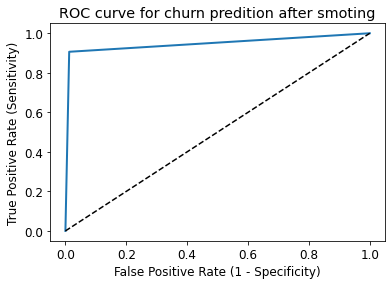

In [59]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = metrics.roc_curve(y2_test,  y2_pred_test)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for churn predition after smoting')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


<AxesSubplot:>

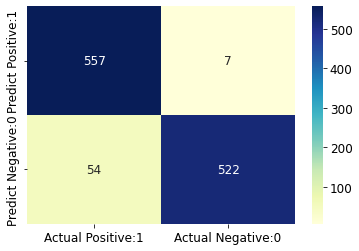

In [60]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm = confusion_matrix(y2_test,y2_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [61]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y2_test,y2_pred_test)
auc

0.9469193262411347

# We got the best accuracy in Random forest training 100% and testing 94.60% and good confusion matrix

In [62]:
import sweetviz as sv

In [63]:
sweet_report = sv.analyze(df)
sweet_report.show_html('telecom_report1.html')

                                             |                                             | [  0%]   00:00 ->…

Report telecom_report1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [66]:
import pickle
pickle_out = open("churn2.pkl","wb")
pickle.dump(Rf,pickle_out)
pickle_out.close()